# Prédiction des prix de maison 

In [205]:
## Instalation de package
import pandas as pd

In [206]:
##Lecture de la base de données

data1= pd.read_csv("./Housing.csv")
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Exploration des données

In [207]:
print("Dimension de la base de données", data1.shape,"\n")

Dimension de la base de données (545, 13) 



In [208]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [209]:
##Afficharge des variables de la base de données
print("Variables de la base de données:\n", "\n",   data1.columns )

Variables de la base de données:
 
 Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [210]:
##Les différents types de variables
data1.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [211]:
data1.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


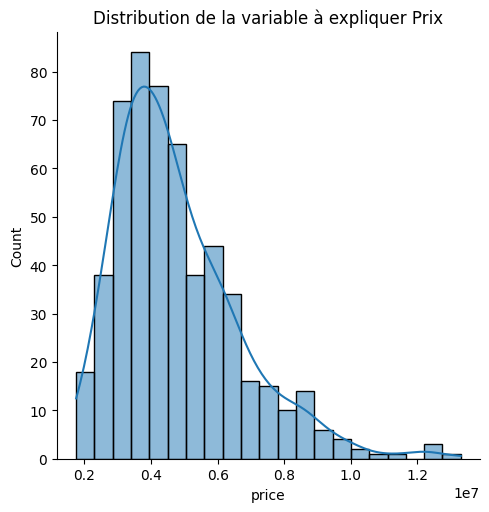

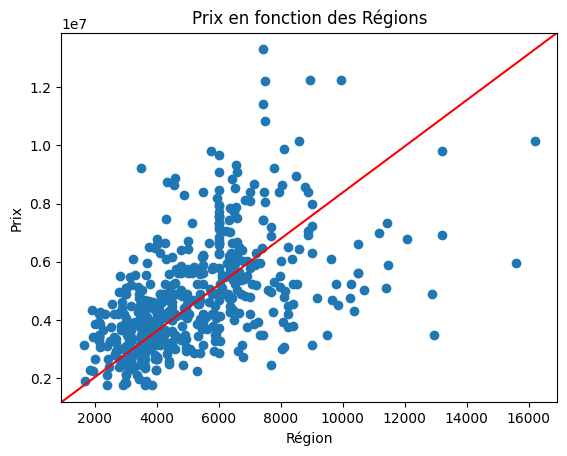

C:\Users\ayena\AppData\Local\Temp\ipykernel_11868\162642907.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr())


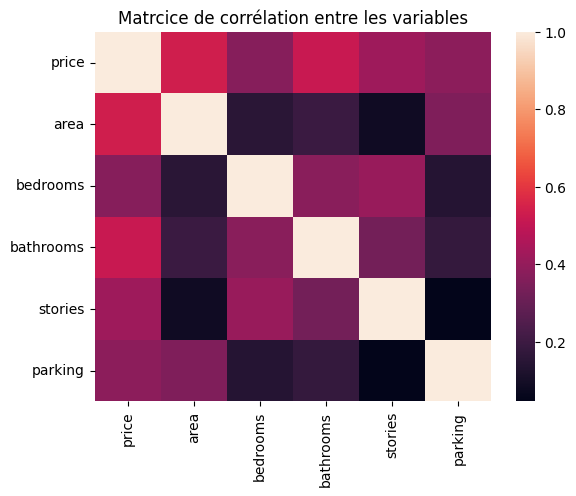

In [212]:

## Installation des packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
%matplotlib inline

##Histogramme de  la variable à expliquer Prix
sns.displot(data1["price"],kde=True)
plt.title("Distribution de la variable à expliquer Prix")
plt.show()

### Nuage de point de la variable Prix en fonction des Régions
fig,ax=plt.subplots()
ax.scatter(data1["area"],data1["price"])
line= mlines.Line2D([0,1],[0,1],color='red')
transform=ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.xlabel("Région")
plt.ylabel("Prix")
plt.title("Prix en fonction des Régions")
plt.show()
##Matrcice de corrélation entre les variables
sns.heatmap(data1.corr())
plt.title("Matrcice de corrélation entre les variables")
plt.show()



In [213]:
## Test de pearson
from scipy.stats import  pearsonr
pd.DataFrame( pearsonr(data1["area"],data1["price"]), index=["pearson_coef","p-value"],columns=["Test de Pearson"])

,Test de Pearson
pearson_coef,5.359973e-01
p-value,7.388225e-42


## Clean and Processing 

In [214]:
##Afficharge des données manquantes
print("Données manquantes par variable: \n", data1.isnull().sum())
#print("Données manquantes par variable: \n", data1.isna().sum())

print("\n")
##Afficharge des données dupliquées
print("Données dupliquées: \n", data1.duplicated().sum())

Données manquantes par variable: 
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Données dupliquées: 
 0


In [215]:
data1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [216]:
data2=data1.copy()

In [217]:
##Sélection des variables qualitatives
data1.select_dtypes(include=['object']).columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [218]:
##Recodage des variables qualitatives
data1['mainroad']=data1['mainroad'].replace(["no","yes"],[0,1])
data1['guestroom']=data1['guestroom'].replace(["no","yes"],[0,1])
data1['basement']=data1['basement'].replace(["no","yes"],[0,1])
data1['hotwaterheating']=data1['hotwaterheating'].replace(["no","yes"],[0,1])
data1['airconditioning']=data1['airconditioning'].replace(["no","yes"],[0,1])
data1['prefarea']=data1['prefarea'].replace(["no","yes"],[0,1])
data1['furnishingstatus']=data1['furnishingstatus'].replace(["furnished","semi-furnished","unfurnished"],[2,1,0])

In [219]:
data1.to_csv("data_prcessing.csv",index=False)

In [220]:
pd.read_csv("./data_prcessing.csv")

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [221]:
## Autre méthode pour recoder les variables catégorielles. Il faut directement les labéliser.
from sklearn.preprocessing import LabelEncoder

# Création d'un objet LabelEncoder
label_encoder = LabelEncoder()
dataframe=data2
# Initialisation du compteur pour suivre le nombre de colonnes encodées
encoded_columns_count = 0

# Parcours de toutes les colonnes du DataFrame
for column_name in dataframe:
    # Vérification si le type de données de la colonne est 'object' (c.-à-d. une caractéristique catégorielle)
    if dataframe[column_name].dtype == 'object':
        # Vérification s'il y a 2 catégories uniques ou moins dans la colonne
        if len(dataframe[column_name].unique()) <= 3:
            # Entraînement de l'encodeur sur les données d'entraînement de cette colonne et transformation de la colonne
            label_encoder.fit(dataframe[column_name])
            dataframe[column_name] = label_encoder.transform(dataframe[column_name])
            # Incrément du compteur de colonnes encodées
            encoded_columns_count += 1

# Affichage du nombre total de colonnes encodées
print('%d colonnes ont été encodées.' % encoded_columns_count)


7 colonnes ont été encodées.


In [222]:
## Séparation de la varible à expliquer (target) et les variables explicatives(features)
y= data1["price"]
X = data1.drop("price", axis=1)

In [223]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


In [224]:
## Division en données d'apprentissage et données test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [225]:
##Normalisation des variables numériques
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler ()
var=['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_train[var]= scaler.fit_transform(X_train[var])
X_test[var]= scaler.transform(X_test[var])


## Modélisation 

#### Régression Linéaire

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Création d'une instance du modèle de régression linéaire
reg=LinearRegression()
# Entraînement du modèle sur les données d'entraînement
reg.fit(X_train,y_train)
#reg.fit(y_train,X_train)

LinearRegression()

In [227]:
import joblib
joblib.dump(reg,"model_regLine")

['model_regLine']

In [228]:
# Prédiction des valeurs sur les données d'entraînement
y_pred_train = reg.predict(X_train)

# Calcul du score R2 sur les données d'entraînement
print("Score R² sur les données d'entraînement :", r2_score(y_train, y_pred_train))

# Prédiction des valeurs sur les données de test
y_pred_test = reg.predict(X_test)

# Calcul du score R2 sur les données de test
print("Score R² sur les données de test :", r2_score(y_test, y_pred_test))


Score R² sur les données d'entraînement : 0.6879699864014102
Score R² sur les données de test : 0.6266250093828516


#### Forêt aléatoire

In [128]:
from sklearn.ensemble import RandomForestRegressor
    
# Création d'une instance du modèle de régression linéaire
reg_rf=RandomForestRegressor()
# Entraînement du modèle sur les données d'entraînement
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

In [129]:
import joblib
joblib.dump(reg,"model_reg_rf")

['model_reg_rf']

In [130]:
# Prédiction des valeurs sur les données d'entraînement
y_pred_train = reg_rf.predict(X_train)

# Calcul du score R2 sur les données d'entraînement
print("Score R² sur les données d'entraînement :", r2_score(y_train, y_pred_train))

# Prédiction des valeurs sur les données de test
y_pred_test = reg_rf.predict(X_test)

# Calcul du score R2 sur les données de test
print("Score R² sur les données de test :", r2_score(y_test, y_pred_test))


Score R² sur les données d'entraînement : 0.9460342991349681
Score R² sur les données de test : 0.5371978087580682


#### Knn

In [131]:
from sklearn.neighbors import KNeighborsRegressor

# Création d'une instance du modèle de régression linéaire
reg_knn=KNeighborsRegressor()
# Entraînement du modèle sur les données d'entraînement
reg_knn.fit(X_train,y_train)

KNeighborsRegressor()

In [132]:
import joblib
joblib.dump(reg,"model_knn_reg")

['model_knn_reg']

In [133]:
# Prédiction des valeurs sur les données d'entraînement
y_pred_train = reg_knn.predict(X_train)

# Calcul du score R2 sur les données d'entraînement
print("Score R² sur les données d'entraînement :", r2_score(y_train, y_pred_train))

# Prédiction des valeurs sur les données de test
y_pred_test = reg_knn.predict(X_test)

# Calcul du score R2 sur les données de test
print("Score R² sur les données de test :", r2_score(y_test, y_pred_test))


Score R² sur les données d'entraînement : 0.7468366606276273
Score R² sur les données de test : 0.5780098916732617


## Réglage des hyperparamètres

In [134]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

# Création d'une liste de dictionnaires pour stocker les résultats
results = []

# Modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'KNN': KNeighborsRegressor()
}

# Boucle sur chaque modèle
for name, model in models.items():
    # Définir les paramètres de la recherche par grille pour les modèles qui en ont besoin
    param_grid = {}
    if name == 'Random Forest':
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif name == 'KNN':
        param_grid = {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }

    # Utilisation de la recherche par grille si des hyperparamètres doivent être ajustés
    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_

    # Entraînement du modèle sur les données d'entraînement
    model.fit(X_train, y_train)
    
    # Prédiction sur les données d'entraînement et de test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calcul les scores R2
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    # Ajout des résultats au tableau
    results.append({
        'Modèle': name,
        'Score R2 (train)': r2_train,
        'Score R2 (test)': r2_test
    })

# Création un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

# Affichage de DataFrame des scores
print(results_df)


              Modèle  Score R2 (train)  Score R2 (test)
0  Linear Regression          0.687970         0.626625
1      Random Forest          0.801830         0.510085
2                KNN          0.764513         0.524433


#### Régression Linéaire

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Créer une instance du modèle de régression linéaire
reg = LinearRegression()

# Créer un pipeline avec StandardScaler et LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regression', reg)
])

# Définir les valeurs des hyperparamètres à tester
param_grid = {'regression__fit_intercept': [True, False]}

# Utiliser la recherche par grille pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire sur les données de test
y_pred_test = grid_search.predict(X_test)

# Calculer le score R2 sur les données de test
print("Score R2 sur les données de test :", r2_score(y_test, y_pred_test))


Meilleurs hyperparamètres : {'regression__fit_intercept': True}
Score R2 sur les données de test : 0.6266250093828516


#### Forêt aléatoire

In [136]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Créer une instance du modèle de forêt aléatoire
rf = RandomForestRegressor()

# Définir les valeurs des hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Utiliser la recherche par grille pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire sur les données de test
y_pred_test = grid_search.predict(X_test)

# Calculer le score R2 sur les données de test
print("Score R2 sur les données de test :", r2_score(y_test, y_pred_test))


Meilleurs hyperparamètres : {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Score R2 sur les données de test : 0.5142616781565224


#### Knn

In [135]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Créer une instance du modèle KNN
knn = KNeighborsRegressor()

# Définir les valeurs des hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Utiliser la recherche par grille pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Utiliser le meilleur modèle pour prédire sur les données de test
y_pred_test = grid_search.predict(X_test)

# Calculer le score R2 sur les données de test
print("Score R2 sur les données de test :", r2_score(y_test, y_pred_test))


Meilleurs hyperparamètres : {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Score R2 sur les données de test : 0.524432884382687
